<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://cdn.open-pr.com/W/1/W111645458_g.jpg" alt="Decision Tree" >

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#32747B;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#FFFFFF;
          font-size:120%;
          text-align:center;">
Import libraries
</p>
</div>

In [36]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import wave
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.fftpack import fft
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn .ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn .ensemble import VotingClassifier , BaggingClassifier , StackingClassifier 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#32747B;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#FFFFFF;
          font-size:120%;
          text-align:center;">
Loading Audio Data
</p>
</div>

In [2]:
def load_dataset(directory):
    X, y = [], []
    
    for word_dir in os.listdir(directory):
        word_path = os.path.join(directory, word_dir)
        if os.path.isdir(word_path):
            for filename in os.listdir(word_path):
                if filename.endswith('.wav'):
                    file_path = os.path.join(word_path, filename)
                    # Extract MFCC features
                    mfcc = extract_mfcc(file_path)
                    X.append(mfcc)
                    y.append(word_dir)
    
    return np.array(X), np.array(y)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#32747B;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#FFFFFF;
          font-size:120%;
          text-align:center;">
Feature Extraction
</p>
</div>

In [3]:
def extract_mfcc(file_path, n_mfcc=13):
    
    signal, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)

In [4]:
X,y=load_dataset(r"C:\Users\Tweety\Videos\AI\Books for DS&AI\Dataset\dataset")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#32747B;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#FFFFFF;
          font-size:120%;
          text-align:center;">
Data scaling
</p>
</div>

In [5]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#32747B;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#FFFFFF;
          font-size:120%;
          text-align:center;">
Label Encoding
</p>
</div>

In [6]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Fit the encoder and transform the labels

<p style="padding: 10px;
          color:#32747B;
          font-size:180%;
          font-family:Serif;
          text-align:center;">   
Split the data
     </p>

In [7]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=42)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#32747B;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#FFFFFF;
          font-size:120%;
          text-align:center;">
Building ML Models
</p>
</div>

----------------
<div style="color:white;
           display:fill;
           border-radius:3px;
           background-color:#74A8D5;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 4px;
          color:white;
          font-size:120%;
          text-align:center;">
Knearest Neighbor
</p>
</div>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png" alt="Knearest Neighbor" width="400" height="250" >

<p style="padding: 10px;
          color:#32747B;
          font-size:180%;
          font-family:Serif;
          text-align:center;">   
Model Training
     </p>

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

<p style="padding: 10px;
          color:#32747B;
          font-size:180%;
          font-family:Serif;
          text-align:center;">   
Evaluation Metrics
     </p>

In [9]:
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\Tweety\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8589473684210527

----------------
<div style="color:white;
           display:fill;
           border-radius:3px;
           background-color:#74A8D5;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 4px;
          color:white;
          font-size:120%;
          text-align:center;">
Random Forest 
</p>
</div>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://www.spotfire.com/content/dam/spotfire/images/graphics/inforgraphics/random-forest-diagram.svg" alt=" Random Forest "width="650" height="40" >

<p style="padding: 10px;
          color:#4D3737;
          font-size:180%;
          font-family:Serif;
          text-align:center;">   
 Random Forest is a technique of Ensamble Learning that builds multiple decision trees on different samples and takes their majority vote for classification and average in case of regression.
     </p>


In [10]:
rf_model = RandomForestClassifier(n_estimators=1000,criterion='gini',random_state = 123)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=123)

In [11]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8842105263157894

-----------------
<div style="color:white;
           display:fill;
           border-radius:3px;
           background-color:#74A8D5;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 4px;
          color:white;
          font-size:120%;
          text-align:center;">
 Naïve Bayes 
</p>
</div>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://media.licdn.com/dms/image/D4E12AQEFlI6OZ4DcsQ/article-cover_image-shrink_600_2000/0/1665583775652?e=2147483647&v=beta&t=JMw-uu004Fv6NSahQ9mQ80zipjur1k1oB_BRGdW6Czg" alt=" Naïve Bayes "width="500" height="500" >

In [12]:
NB_model = GaussianNB()
NB_model.fit(X_train , y_train)

GaussianNB()

In [13]:
y_pred = NB_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8473684210526315

-----------------
<div style="color:white;
           display:fill;
           border-radius:3px;
           background-color:#74A8D5;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 4px;
          color:white;
          font-size:120%;
          text-align:center;">
SVC [Support Vector Classifier]
</p>
</div>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://velog.velcdn.com/images/shlee0125/post/cc79313d-5a9c-406e-a9a6-45c5d9292e2f/image.png" alt=" SVC "width="550" height="550" >


In [14]:
svm = SVC()
svm.fit(X_train , y_train)

SVC()

In [15]:
y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.8831578947368421


----------------
<div style="color:white;
           display:fill;
           border-radius:3px;
           background-color:#74A8D5;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 4px;
          color:white;
          font-size:120%;
          text-align:center;">
Logistic Regression
</p>
</div>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://www.dataschool.io/content/images/2021/02/logistic_regression.png" alt=" Logistic Regression "width="550" height="550" >


In [16]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred = lr_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.848421052631579

----------------
<div style="color:white;
           display:fill;
           border-radius:3px;
           background-color:#74A8D5;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 4px;
          color:white;
          font-size:120%;
          text-align:center;">
Voting Technique 
</p>
</div>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://imgur.com/eAruUj3.png" alt="  Voting "width="750" height="600" >

 <p style="padding: 10px;
          color:#4D3737;
          font-size:180%;
          font-family:Serif;
          text-align:center;">   
 Voting Classifier is a Ensamble Learning Technique that trains various base models or estimators and predicts the output on the basis of aggregating the findings of each base estimator
     </p>

 

In [18]:
svm = SVC()
LR = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
models = [('SVM',svm),('Decision Tree',tree),('Logistic Regerssion',LR) , ('KNN',knn)]

voting_model = VotingClassifier(estimators= models)

In [20]:
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM', SVC()),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('Logistic Regerssion', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=3))])

In [21]:
y_pred = voting_model.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\Tweety\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8747368421052631

---------------
<div style="color:white;
           display:fill;
           border-radius:3px;
           background-color:#74A8D5;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 4px;
          color:white;
          font-size:120%;
          text-align:center;">
Bagging Technique 
</p>
</div>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png" alt="Bagging" width="750" height="600" >

<p style="padding: 10px;
          color:#4D3737;
          font-size:180%;
          font-family:Serif;
          text-align:center;">   
Bagging is an Ensamble Learning Technique that creates base models with same algoriths and trained in bootstrap data in parallel and the final predictions are determined by combining the predictions from all the models
     </p>


In [22]:
bagging = BaggingClassifier(
    base_estimator= knn,
    n_estimators = 10
)


bagging.fit(X_train , y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3))

In [23]:
y_pred = bagging.predict(X_test)
accuracy_score(y_test,y_pred)

0.8694736842105263

----------------
<div style="color:white;
           display:fill;
           border-radius:3px;
           background-color:#74A8D5;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 4px;
          color:white;
          font-size:120%;
          text-align:center;">
Stacking Technique 
</p>
</div>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://miro.medium.com/v2/resize:fit:1400/1*3LgG3geyPppu52SwZ4b5kQ.png" alt="Stacking" width="750" height="600" >

<p style="padding: 10px;
          color:#4D3737;
          font-size:180%;
          font-family:Serif;
          text-align:center;">   
Stacking is an Ensamble Learning Technique entails training numerous base models on the same training dataset, then feeding their predictions into a higher-level model, also known as a meta-model to make the final prediction
     </p>

In [24]:
base_models = [('SVM',SVC()),('Decision Tree',DecisionTreeClassifier()),('Logistic Regerssion',LogisticRegression()) , ('KNN',KNeighborsClassifier(n_neighbors=3))]
stacking = StackingClassifier(
    estimators = base_models , 
    final_estimator = LogisticRegression(),
    cv = 5)

stacking.fit(X_train , y_train)

StackingClassifier(cv=5,
                   estimators=[('SVM', SVC()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Logistic Regerssion', LogisticRegression()),
                               ('KNN', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=LogisticRegression())

In [25]:
y_pred = stacking.predict(X_test)
accuracy_score(y_test,y_pred)

0.8757894736842106

----------------
<div style="color:white;
           display:fill;
           border-radius:3px;
           background-color:#74A8D5;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 4px;
          color:white;
          font-size:120%;
          text-align:center;">
XGBoost Classifier 
</p>
</div>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://www.researchgate.net/publication/357326883/figure/fig4/AS:1106218835816448@1640754531043/A-schematic-illustration-of-XGBoost-depicting-the-main-node-interior-nodes-and-the.png" alt="Stacking" width="750" height="600" >

In [26]:
xgb = XGBClassifier(n_estimators=10000, max_depth=11, learning_rate=0.01, objective='binary:logistic')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8947368421052632



<div style="width:100%;text-align: center; background-color:#white;"> 
<div style="color:white;
           display:fill;
           border-radius:3px;
           background-color:#74A8D5;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 4px;
          color:white;
          font-size:120%;
          text-align:center;">
Extra_Tree Classifier 
</p>
</div>

<div style="width:100%;text-align: center; background-color:#white;"> <img align=middle src="https://miro.medium.com/v2/resize:fit:1054/1*cdkwGSf9xshwWNfA4lvyAw.png" alt="Stacking" width="750" height="600" >

In [39]:
Extra= ExtraTreesClassifier(n_estimators=10000, random_state=0)
Extra.fit(X_train, y_train)
y_pred = Extra.predict(X_test)
accuracy_score(y_test,y_pred)

0.8989473684210526

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#32747B;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:#FFFFFF;
          font-size:120%;
          text-align:center;">
Testing and Deployment
</p>
</div>

In [50]:
X_t=[]
word_path=r"C:\Users\Tweety\Videos\AI\Books for DS&AI\sound_test"
for speech in os.listdir(word_path):
    if speech.endswith('.wav'):
        file_path = os.path.join(word_path, speech)
        mfcc = extract_mfcc(file_path)
        X_t.append(mfcc)

In [51]:
X_t= scaler.fit_transform(X_t)

In [52]:
y_pred = xgb.predict(X_t)

In [53]:
print(label_encoder.inverse_transform(y_pred))

['yes' 'yes' 'yes' 'no']


In [60]:
audio_file1=r"C:\Users\Tweety\Videos\AI\Books for DS&AI\sound_test\3.wav"
audio_1, sr = librosa.load(audio_file1, sr=None)

In [61]:
import sounddevice as sd
sd.play(audio_1, sr)
sd.wait()

<p style="padding: 10px;
          color:#32747B;
          font-size:180%;
          font-family:Serif;
          text-align:center;">   
More Models
     </p>

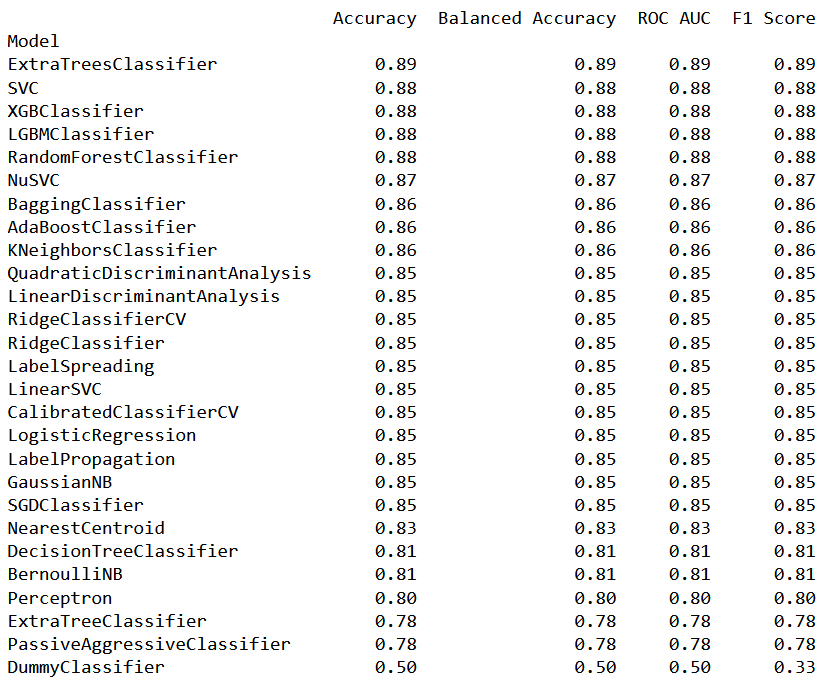